In [ ]:
import cv2
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile
from google.colab.patches import cv2_imshow

In [ ]:
with ZipFile("/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Mango_diseases /mango_leaf_disease.zip", 'r') as zipObj:
   zipObj.extractall("/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Mango_diseases /Mango_leaf_diseases")

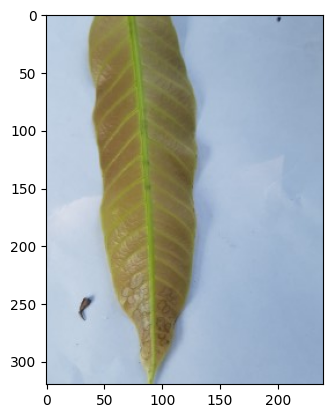

In [ ]:
image = cv2.imread("/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Mango_diseases /Mango_leaf_diseases/mango_leaf_disease/Anthracnose/20211008_124256 (Custom).jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [ ]:
K = 5
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [ ]:
center = np.uint8(center)

In [ ]:
re_shape = center[label.flatten()]
result_image = re_shape.reshape((img.shape))
colors= center.flatten()

In [ ]:
colors

array([168, 188, 212, 119, 108,  60, 151, 173, 200, 145, 139,  79, 191,
       206, 223], dtype=uint8)

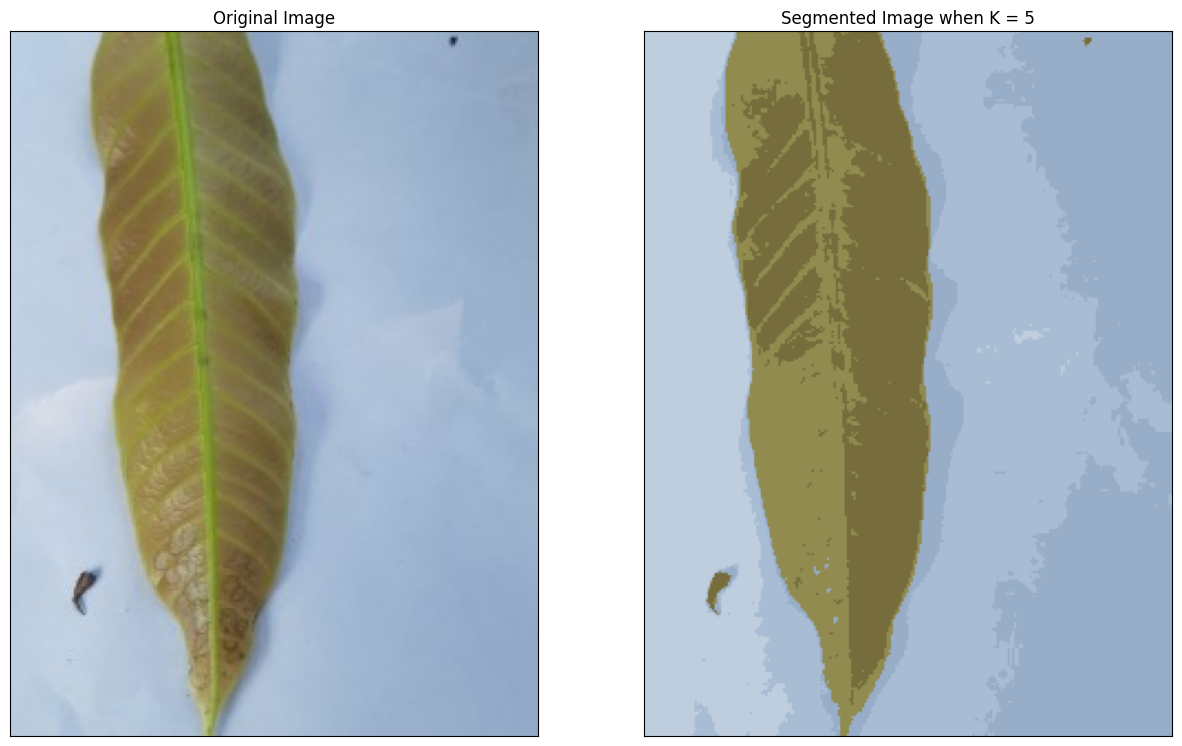

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

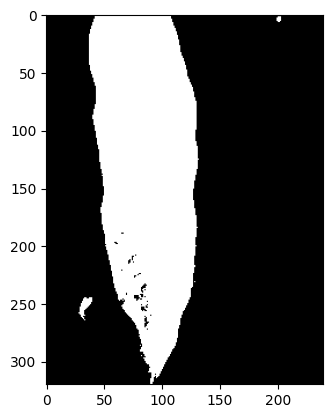

In [ ]:
gray_img=np.invert(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

_, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary_img,"gray")

In [ ]:
def DCD(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    vectorized = img.reshape((-1, 3))
    vectorized = np.float32(vectorized)
    K = 5
    attempts = 10
    ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    colors = center.flatten()
    colors = colors[:7]

    return colors

def fouriers(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    _, binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contour = max(contours, key=cv2.contourArea)
    boundary_points = contour[:, 0, :]
    complex_boundary = boundary_points[:, 0] + 1j * boundary_points[:, 1]
    descriptors = np.fft.fft(complex_boundary)
    descriptors[0] = 0
    descriptors /= np.abs(descriptors[1])
    magnitudes = np.abs(descriptors)
    index=np.argsort(magnitudes)[-10:]
    sigCoef=magnitudes[index]



    return  sigCoef

In [ ]:
def charExtractor(folderPath, leafclass):
    data = []
    for filename in os.listdir(folderPath):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folderPath, filename)
            colors = DCD(img_path)
            mag = fouriers(img_path)
            char = np.concatenate((colors, mag, [leafclass]))
            data.append(char)
    print(leafclass, " Ready")
    return data

In [ ]:
charAtn = charExtractor('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Mango_diseases /Mango_leaf_diseases/mango_leaf_disease/Anthracnose/', 'Anthracnose')
charAtn = charExtractor('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Mango_diseases /Mango_leaf_diseases/mango_leaf_disease/Bacterial Canker/', 'Bacterial Canke')
charWee = charExtractor('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Mango_diseases /Mango_leaf_diseases/mango_leaf_disease/Cutting Weevil/', 'Cutting Weevil')
charDie = charExtractor('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Mango_diseases /Mango_leaf_diseases/mango_leaf_disease/Die Back/', 'Die Back')
charGall = charExtractor('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Mango_diseases /Mango_leaf_diseases/mango_leaf_disease/Gall Midge/', 'Gall Midge')
charHealty = charExtractor('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Mango_diseases /Mango_leaf_diseases/mango_leaf_disease/Healthy/', 'Healthy')
charMildew= charExtractor('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Mango_diseases /Mango_leaf_diseases/mango_leaf_disease/Powdery Mildew/', 'Mildew')
charMould = charExtractor('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Mango_diseases /Mango_leaf_diseases/mango_leaf_disease/Sooty Mould/', 'Mould')

Anthracnose  Ready
Bacterial Canke  Ready
Cutting Weevil  Ready
Die Back  Ready
Gall Midge  Ready
Healthy  Ready
Mildew  Ready
Mould  Ready


In [ ]:
colums=[f'c_{i}' for i in range(7)] + [f'm_{i}' for i in range(10)]+ ["Class"]

In [ ]:
data = charAtn + charAtn + charWee + charDie + charGall + charHealty + charMildew + charMould

In [ ]:
df=pd.DataFrame(data,columns=colums)
df

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,Class
0,180,175,167,85,93,49,208,0.0695521503401281,0.09326203845678331,0.12808269267490752,0.12880584794713665,0.19001351628798172,0.3010592917549328,0.32772884182595646,0.9329830607101431,0.9999999999999999,8.843280097089144,Bacterial Canke
1,90,91,33,206,204,199,171,0.04119533684724633,0.05374083161992766,0.06288866470178137,0.06466060182052623,0.06839531074484041,0.14861244890657135,0.2527615520722627,0.29181672098411304,0.9999999999999998,2.3942583836133964,Bacterial Canke
2,161,160,160,126,120,114,140,0.36078852465781586,0.4926068631238993,0.8783622463243982,1.0,1.0739292705782661,1.276778388969222,1.7599705772241045,1.9405025119249633,3.471765168194969,4.811454212662785,Bacterial Canke
3,203,209,142,165,161,142,186,0.3032642669494693,0.40449837656934196,0.427229177505237,0.4661006731345255,0.5100888153027731,0.5340270784155159,0.5787950615831574,1.0000000000000002,1.8263822364976605,6.356575731540756,Bacterial Canke
4,176,175,171,81,85,36,148,0.17199000345735743,0.20814608735163287,0.25087091122720195,0.5356978454367841,0.5858686437267893,0.5901629464967998,0.6188077911524573,1.0,2.664056339909967,2.6777077248215417,Bacterial Canke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,191,192,195,73,78,45,146,0.0644737595793338,0.06633700473497321,0.1371812849967061,0.17466652755759587,0.23103849573833557,0.3866099203932893,0.40090085224349176,0.5684994768600323,0.9999999999999999,3.304590536181808,Mould
3996,194,194,196,141,141,96,104,0.04482414151114201,0.05627884230293063,0.06983717597692828,0.08146175352323541,0.14481567639372134,0.2431490905365362,0.25414380464057185,0.28766198245573493,1.0,1.9396693644562149,Mould
3997,216,211,212,45,44,21,121,0.11129879715285865,0.11320201892492011,0.14778475456532622,0.15776495288809392,0.20618924314575324,0.36457020959250597,0.5617612350739891,0.6782290678744248,1.0000000000000002,4.130338053389507,Mould
3998,242,243,242,98,98,59,194,0.05821251778335866,0.1066235170401855,0.12564154275196918,0.1270564304673648,0.3754694758385045,0.4452846535418274,0.5932809210414064,1.0000000000000002,1.3612799986502053,2.150525398153041,Mould


In [ ]:
X=df.drop(columns=["Class"])
y=df["Class"]

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=1997)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

Random Forest Accuracy: 0.79625


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo k-NN con hiperparámetros
k = 5  # Número de vecinos
knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # Distancia Euclidiana (p=2)
knn_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn_model.predict(X_test)
print("Accuracy de k-NN:", accuracy_score(y_test, y_pred))

Accuracy de k-NN: 0.73
